<a href="https://colab.research.google.com/github/mohadesehazari98/Quantum_Library/blob/main/Xanadu/%20Cat_Result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python --version

Python 3.8.16


In [ ]:
#...Installation...#
!pip install strawberryfields --upgrade

In [ ]:
#...IMPORTING LIBRARIES...#

import numpy as np
import strawberryfields as sf 
from strawberryfields.ops import *
from strawberryfields.apps import sample
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In the paper [Reference](https://journals.aps.org/pra/pdf/10.1103/PhysRevA.68.042319?casa_token=u1SaMhcSnmwAAAAA%3AiabyBitCd4es2kv31DOh7UtyfuQPaa26Azf0_p7omlioX0ANoqikg5WLSZdW0IXTrJ6dMt0kKMU-) the squeezed state is represented as:
 **𝚿** 

we can have a corespondance between Landa and r which is  $λ = - e^{i\phi} tanh(r) $

lets first calculate the Mean Photon number for  $\lambda cos^2(\theta) = 0.4 $ and $λ = tanh(1.5)$ 

since tanh() and cos() functions has limitations, we cannot choose any values of r and θ that we want 

$r ≥ tanh^{-1}(K_{max})$

$θ ≤ cos^{-1}(\sqrt {K_{max}})$

$θ ≥ π - cos^{-1}(\sqrt {K_{max}})$

Also 

$ K_{max} ≤ 1 $

In [ ]:
k_max = 0.2e-6
#so by changing the k vector we can set appropriate values for θ

In [ ]:
r_limit = np.arctanh(k_max)
theta_limit_down = np.arccos(np.sqrt(k_max))
theta_limit_high = np.pi - np.arccos(np.sqrt(k_max))
print('r ≥', r_limit)
print('θ ≤', theta_limit_down)
print('θ ≥', theta_limit_high)

r ≥ 2.0000000000000266e-07
θ ≤ 1.5703491131844896
θ ≥ 1.5712435404053036


In [ ]:
#...SEED...#
np.random.seed(42)
phi_r = (np.pi)
phi_B = (np.pi)/2
# for λ = tanh(1.5) and k=0.4 and varying θ
theta = np.arccos(np.sqrt(0.4/np.tanh(1.5))) / 2

shots = 3500
modes_N = 2
m_range = 6

In [ ]:
#...TOKEN KEY...#

import xcc
settings = xcc.Settings(REFRESH_TOKEN="eyJhbGciOiJIUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICIwYTdjOGE5Yi1lMzdkLTQ0MzItOTU2OC0xNzI3YzEwNmYyMzEifQ.eyJpYXQiOjE2NzE0ODg4OTQsImp0aSI6IjgwNWI1ZDMyLTRlOTAtNDdjOS04MzAyLWE5MjhlMjQ0ZmI3MSIsImlzcyI6Imh0dHBzOi8vcGxhdGZvcm0ueGFuYWR1LmFpL2F1dGgvcmVhbG1zL3BsYXRmb3JtIiwiYXVkIjoiaHR0cHM6Ly9wbGF0Zm9ybS54YW5hZHUuYWkvYXV0aC9yZWFsbXMvcGxhdGZvcm0iLCJzdWIiOiI5YjVhYTExYS03NWY4LTQ0YTItYjkwZS1lZmRlZmM0YmRkOTciLCJ0eXAiOiJPZmZsaW5lIiwiYXpwIjoicHVibGljIiwic2Vzc2lvbl9zdGF0ZSI6IjgxMTYxMDJiLTljNjctNGY1ZC04MjdmLTYyYzNlM2NlODM5MyIsInNjb3BlIjoicHVibGljLXJvbGVzIHByb2ZpbGUgZW1haWwgb2ZmbGluZV9hY2Nlc3MiLCJzaWQiOiI4MTE2MTAyYi05YzY3LTRmNWQtODI3Zi02MmMzZTNjZTgzOTMifQ.ssX4d1H-WCJtYSMuUFH4WLJPLgz1HGaF3fZuvTs2UuE")
settings.save()

In [ ]:
import xcc

connection = xcc.Connection.load()
assert connection.ping().ok

In [ ]:
#...SETTING THE CIRCUIT/PROGRAM...#

program = sf.Program(modes_N)

In [ ]:
def first_circuit(m):
  #eng.reset()
  program = sf.Program(2)
  eng = sf.Engine(backend="fock", backend_options={"cutoff_dim": 30})

  with program.context as q:
    Sgate(1.5,phi_r) | q[0]
    Vac | q[1]
    BSgate(theta,phi_B) | (q[0], q[1])
    MeasureFock(select=m) | q[0]
    MeasureFock() | q[1]  

  #post selection 
  result = np.zeros((shots,2))
  for i in range(len(result)):
    out_result = eng.run(program)
    result[i,:] = out_result.samples

  vector = result[:,1]
  final_out = sum(vector) / shots
  return final_out

In [ ]:
#post selection 

mean_inside = np.zeros((m_range+2,1))
for m in range(m_range+2):
  mean_inside[m,0] = first_circuit(m)
  print(mean_inside[m,0])

0.02
1.0725714285714285
0.18685714285714286
1.2062857142857142
0.5422857142857143
1.4057142857142857
0.972
1.5691428571428572


In [ ]:
mean_inside = [0.02,1.0725714285714285,0.18685714285714286,1.2062857142857142,0.5422857142857143,1.4057142857142857,0.972,1.5691428571428572]
theta_D = (theta * 180) / (np.pi)
print("θ' =",theta_D,"θ =", 2*theta_D)
print('λ =', np.tanh(1.5))

θ' = 24.16773344800069 θ = 48.33546689600138
λ = 0.9051482536448664


for $ \lambda cos^2(\theta) = 0.4 $ and $ m = [0,1,2,3,4,5,6,7]$

*based on the graph the mean photon number increase as the m increase*

*why? _ Prove it!*

$U_{ab} |γ⟩_{a} |β⟩_{b} = |cos(θ/2) γ+isin(θ/2)β⟩|cos(θ/2) β+isin(θ/2)γ⟩$

$|γ⟩_{a} = |sq⟩ = \frac{1}{\sqrt{cosh(r)}} \sum_{n=0}^∞ \frac{\sqrt{(2n)!}}{2^n n!} (-e^{iϕ}tanh(r))^n |2n⟩ = ∑ f(n) |2n⟩ = f(0) |0⟩ + f(1) |2⟩+ f(2) |4⟩+...$

$|0⟩|0⟩ --- |0⟩|0⟩$

$|2⟩|0⟩ --- {|0⟩|2⟩,|1⟩|1⟩,|2⟩|0⟩}$

$|4⟩|0⟩ --- {|0⟩|4⟩,|1⟩|3⟩,|2⟩|2⟩,|3⟩|1⟩,|4⟩|0⟩}$

$|6⟩|0⟩ --- {|0⟩|6⟩,|1⟩|5⟩,|2⟩|4⟩,|3⟩|3⟩,|4⟩|2⟩,|5⟩|1⟩,|6⟩|0⟩}$

...

So you can see that the probability of detecting smaller m is higher, but once an m has been detected, higher m has higher mean photon number(since the sum is over ∞)

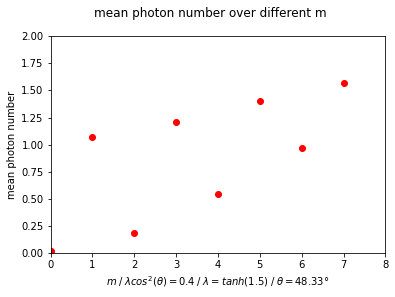

In [ ]:
m_axis = [0, 1, 2, 3, 4, 5, 6, 7]
plt.plot(m_axis, mean_inside, 'ro')
# naming the x axis
plt.xlabel(r'$m _ / _ \lambda cos^2(\theta)=0.4 _ / _ \lambda = tanh(1.5) _ / _ θ = 48.33° $')
# naming the y axis
plt.ylabel('mean photon number')
plt.axis([0, 8, 0, 2])
plt.suptitle('mean photon number over different m ')
plt.show()



---



---



---



plot the Mean_Photon_Number over $\theta$ and m 

Also plot the Mean_Photon_Number over $\lambda$ and m 

$ \lambda cos^2(\theta) =  \bar{k} $

$ tanh(r) cos^2(2 \theta ') = \bar{k}$

$ \theta ' = (\cos^{-1} {\sqrt{\frac{k[i]}{tanh(r)}}} )/ 2$

$r = tanh^{-1}(\frac{k[i]}{cos^2(\theta)})$

* constant λ and varying θ | Set k=[0.01 : 0.99] | r = 2.7

In [ ]:
precision = 50
k = np.linspace(0.01, 0.99,precision)
r_set = 2.7
angles = np.zeros((len(k),1))
for i in range(len(k)):
  angles[i,0] = np.arccos(np.sqrt(k[i]/np.tanh(r_set))) / 2

In [ ]:
from scipy.stats import median_test
def run_circuit(r_squeezed,bs_angle,m):
  #eng.reset()
  program = sf.Program(2)
  eng = sf.Engine(backend="fock", backend_options={"cutoff_dim": 30})

  with program.context as q:
    Sgate(r_squeezed,phi_r) | q[0]
    # q1 is initialized in a vaccum state by default
    BSgate(bs_angle,phi_B) | (q[0], q[1])
    MeasureFock(select=m) | q[0]
    MeasureFock() | q[1]

  #post selection 
  result = np.zeros((shots,2))
  for i in range(len(result)):
    out_result = eng.run(program)
    result[i,:] = out_result.samples

  vector = result[:,1]
  final_out = sum(vector) / shots
  return final_out

In [ ]:
results = np.empty((shots, 2))
m_list =np.zeros((len(k),m_range))
# this loops evaluate all angles
for m in range(1,m_range+1):
  mean_photon_list = []
  for j in range(len(k)):
    # this loop runs the circuit `num_shots` times
    mean_output = run_circuit(r_set,angles[j,0],m)
    # here you get the maverage for both detectors
    mean_photon_list.append(mean_output)
    # replace this print statement by any postprocessing you'd to perform
  m_list[:,m-1] = mean_photon_list
  print(mean_photon_list)

[3.5485714285714285, 3.001714285714286, 2.621142857142857, 2.4737142857142858, 2.2954285714285714, 2.1674285714285713, 1.9794285714285715, 1.7697142857142858, 1.6228571428571428, 1.54, 1.448, 1.3422857142857143, 1.2617142857142858, 1.1554285714285715, 1.1131428571428572, 0.9994285714285714, 0.9662857142857143, 0.8714285714285714, 0.8171428571428572, 0.7502857142857143, 0.6988571428571428, 0.6291428571428571, 0.5645714285714286, 0.5657142857142857, 0.5331428571428571, 0.43657142857142855, 0.3914285714285714, 0.3657142857142857, 0.32457142857142857, 0.3068571428571429, 0.2725714285714286, 0.22914285714285715, 0.224, 0.18685714285714286, 0.15371428571428572, 0.12971428571428573, 0.11542857142857142, 0.116, 0.09028571428571429, 0.07657142857142857, 0.072, 0.045142857142857144, 0.03142857142857143, 0.02857142857142857, 0.017714285714285714, 0.011428571428571429, 0.006285714285714286, 0.001142857142857143, 0.0005714285714285715, 0.0]
[4.432571428571428, 3.9045714285714284, 3.5171428571428573

In [ ]:
#list has been copied from the printed result for saving processing time
m_list =np.zeros((len(k),m_range))
m_list[:,0] = [1.7394285714285713, 1.5942857142857143, 1.4708571428571429, 1.4805714285714286, 1.4154285714285715, 1.3954285714285715, 1.344, 1.2794285714285714, 1.2622857142857142, 1.248, 1.2302857142857142, 1.217142857142857, 1.2085714285714286, 1.1737142857142857, 1.1525714285714286, 1.1417142857142857, 1.144, 1.1222857142857143, 1.1062857142857143, 1.092, 1.0885714285714285, 1.0725714285714285, 1.0714285714285714, 1.0737142857142856, 1.0657142857142856, 1.0571428571428572, 1.0565714285714285, 1.0485714285714285, 1.0371428571428571, 1.0371428571428571, 1.0342857142857143, 1.0251428571428571, 1.024, 1.024, 1.018857142857143, 1.0165714285714287, 1.0137142857142858, 1.0142857142857142, 1.0102857142857142, 1.0085714285714287, 1.0102857142857142, 1.0074285714285713, 1.004, 1.002857142857143, 1.0022857142857142, 1.002857142857143, 1.0005714285714287, 1.0, 1.0, 1.0]
m_list[:,1] = [1.7702857142857142, 1.4982857142857142, 1.3394285714285714, 1.209142857142857, 1.0994285714285714, 0.9874285714285714, 0.9148571428571428, 0.7971428571428572, 0.7348571428571429, 0.6817142857142857, 0.6342857142857142, 0.5788571428571428, 0.5862857142857143, 0.49314285714285716, 0.46914285714285714, 0.444, 0.3914285714285714, 0.3822857142857143, 0.3325714285714286, 0.2988571428571429, 0.30228571428571427, 0.2382857142857143, 0.23714285714285716, 0.21828571428571428, 0.19657142857142856, 0.176, 0.16057142857142856, 0.13314285714285715, 0.12742857142857142, 0.12342857142857143, 0.09942857142857142, 0.08971428571428572, 0.08742857142857142, 0.068, 0.06, 0.04285714285714286, 0.044571428571428574, 0.04057142857142857, 0.027428571428571427, 0.026285714285714287, 0.016, 0.017142857142857144, 0.014285714285714285, 0.0074285714285714285, 0.006857142857142857, 0.001142857142857143, 0.0017142857142857142, 0.0, 0.0, 0.0]
m_list[:,2] = [2.9948571428571427, 2.6045714285714285, 2.372, 2.270857142857143, 2.0588571428571427, 1.9845714285714287, 1.9182857142857144, 1.82, 1.7611428571428571, 1.704, 1.604, 1.578857142857143, 1.5325714285714285, 1.4748571428571429, 1.4617142857142857, 1.4377142857142857, 1.3805714285714286, 1.3622857142857143, 1.3274285714285714, 1.2885714285714285, 1.2497142857142858, 1.229142857142857, 1.212, 1.1914285714285715, 1.1674285714285715, 1.161142857142857, 1.1765714285714286, 1.1377142857142857, 1.1177142857142857, 1.1074285714285714, 1.0902857142857143, 1.0805714285714285, 1.0834285714285714, 1.066857142857143, 1.0605714285714285, 1.054857142857143, 1.048, 1.0274285714285714, 1.0257142857142858, 1.024, 1.018857142857143, 1.0194285714285714, 1.0102857142857142, 1.0057142857142858, 1.0034285714285713, 1.0017142857142858, 1.0022857142857142, 1.0017142857142858, 1.0, 1.0]
m_list[:,3] = [3.5068571428571427, 3.0874285714285716, 2.7445714285714287, 2.4988571428571427, 2.2817142857142856, 2.1, 1.925142857142857, 1.7354285714285713, 1.6285714285714286, 1.5514285714285714, 1.4685714285714286, 1.352, 1.330857142857143, 1.1782857142857144, 1.124, 1.0474285714285714, 0.9457142857142857, 0.9114285714285715, 0.7914285714285715, 0.7468571428571429, 0.7177142857142857, 0.612, 0.5925714285714285, 0.5411428571428571, 0.5, 0.4491428571428571, 0.44342857142857145, 0.38, 0.3514285714285714, 0.3017142857142857, 0.24914285714285714, 0.23714285714285716, 0.21771428571428572, 0.18685714285714286, 0.152, 0.13142857142857142, 0.124, 0.11314285714285714, 0.07942857142857143, 0.06571428571428571, 0.04971428571428571, 0.048, 0.036571428571428574, 0.022285714285714287, 0.019428571428571427, 0.006285714285714286, 0.008571428571428572, 0.001142857142857143, 0.0, 0.0]
m_list[:,4] = [4.432571428571428, 3.9045714285714284, 3.5171428571428573, 3.257142857142857, 3.0285714285714285, 2.832, 2.677714285714286, 2.4634285714285715, 2.354285714285714, 2.245142857142857, 2.181142857142857, 2.065142857142857, 2.0605714285714285, 1.9234285714285715, 1.876, 1.7982857142857143, 1.7108571428571429, 1.676, 1.6171428571428572, 1.5445714285714285, 1.5342857142857143, 1.4417142857142857, 1.4314285714285715, 1.38, 1.3594285714285714, 1.3285714285714285, 1.3177142857142856, 1.2571428571428571, 1.232, 1.2005714285714286, 1.1645714285714286, 1.1674285714285715, 1.1582857142857144, 1.1268571428571428, 1.1062857142857143, 1.0874285714285714, 1.084, 1.0731428571428572, 1.0502857142857143, 1.0485714285714285, 1.0314285714285714, 1.0302857142857142, 1.0251428571428571, 1.0142857142857142, 1.0125714285714287, 1.0034285714285713, 1.0045714285714287, 1.0, 1.0, 1.0]
m_list[:,5] = [5.249142857142857, 4.4874285714285715, 3.9937142857142858, 3.7657142857142856, 3.3754285714285714, 3.1222857142857143, 2.9691428571428573, 2.728, 2.5782857142857143, 2.4194285714285715, 2.244, 2.1485714285714286, 2.0171428571428573, 1.852, 1.7622857142857142, 1.7, 1.5697142857142856, 1.4897142857142858, 1.3954285714285715, 1.278857142857143, 1.164, 1.1022857142857143, 1.006857142857143, 0.9337142857142857, 0.864, 0.7868571428571428, 0.7634285714285715, 0.6862857142857143, 0.604, 0.5571428571428572, 0.4897142857142857, 0.43942857142857145, 0.4125714285714286, 0.36742857142857144, 0.3182857142857143, 0.2737142857142857, 0.244, 0.18228571428571427, 0.14914285714285713, 0.11657142857142858, 0.10514285714285715, 0.08685714285714285, 0.06342857142857143, 0.044571428571428574, 0.03485714285714286, 0.017142857142857144, 0.012571428571428572, 0.006857142857142857, 0.0005714285714285715, 0.0]

angles_D = (angles * 180) / (np.pi)
print("In degree: ","θ' = [",angles_D[0,0] ,":",angles_D[precision-1,0],"]","θ = [",2*angles_D[0,0] ,":",2*angles_D[precision-1,0],"]")
print('λ =', np.tanh(2.7))

In degree:  θ' = [ 42.117380726640775 : 0.9135668468406252 ] θ = [ 84.23476145328155 : 1.8271336936812503 ]
λ = 0.9910074536781176


$ <n> mean-photon-number $

*Why the mean photon number is decreasing over higher θ*

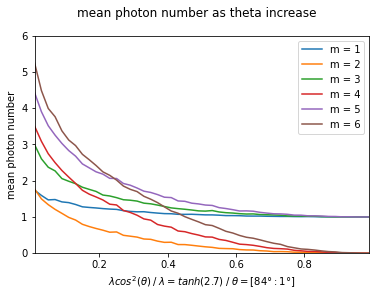

In [ ]:
plt.plot(k, m_list[:,0], label = "m = 1") #m=1 ,shots=2500
plt.plot(k, m_list[:,1], label = "m = 2") #m=2 ,shots=2500
plt.plot(k, m_list[:,2], label = "m = 3") #m=3 ,shots=2500
plt.plot(k, m_list[:,3], label = "m = 4") #m=4 ,shots=2500
plt.plot(k, m_list[:,4], label = "m = 5") #m=5 ,shots=2500
plt.plot(k, m_list[:,5], label = "m = 6") #m=6 ,shots=2500
plt.legend()
# naming the x axis
plt.xlabel(r'$\lambda cos^2(\theta) _ / _ \lambda = tanh(2.7) _ / _ θ = [84°:1°] $')
# naming the y axis
plt.ylabel('mean photon number')
plt.axis([0.01, 0.99, 0, 6])
plt.suptitle('mean photon number as theta increase')
plt.show()



---



---



---



---



* constant θ and varying λ 
  * θ $ \approx$ 0 | Set k=[0.01 : 0.99] | θ = 0.1

In [ ]:
def find_radius(precision,k_lower,k_upper,theta_set):
  k = np.linspace(k_lower, k_upper, precision)
  radius = np.zeros((len(k),1))
  for i in range(len(k)):
    radius[i,0] = np.arctanh(k[i]/np.power(np.cos(theta_set),2))
  return radius,len(k)

In [ ]:
k_upper = 0.99
precision = 50
theta_set = 0.1
[radius,Len_k] = find_radius(precision,k_upper,theta_set)

go to cell 10

In [ ]:
results = np.empty((shots, 2))
m_list =np.zeros((Len_k,m_range))
# this loops evaluate all angles
for m in range(1,m_range+1):
  mean_photon_list = []
  for j in range(Len_k):
    # this loop runs the circuit `num_shots` times
    mean_output = run_circuit(radius[j,0],theta_set/2,m)
    # here you get the maverage for both detectors
    mean_photon_list.append(mean_output)
    # replace this print statement by any postprocessing you'd to perform
  m_list[:,m-1] = mean_photon_list
  print(mean_photon_list)

[1.0177142857142858, 1.016, 1.014857142857143, 1.0234285714285714, 1.0245714285714285, 1.032, 1.0234285714285714, 1.0222857142857142, 1.024, 1.0302857142857142, 1.0274285714285714, 1.0302857142857142, 1.038857142857143, 1.0302857142857142, 1.0297142857142858, 1.028, 1.0371428571428571, 1.030857142857143, 1.0297142857142858, 1.0354285714285714, 1.0411428571428571, 1.0377142857142858, 1.0342857142857143, 1.034857142857143, 1.046857142857143, 1.0411428571428571, 1.0422857142857143, 1.0445714285714285, 1.04, 1.046857142857143, 1.0474285714285714, 1.0462857142857143, 1.050857142857143, 1.0497142857142858, 1.0474285714285714, 1.0514285714285714, 1.0594285714285714, 1.066857142857143, 1.06, 1.0685714285714285, 1.0805714285714285, 1.0691428571428572, 1.0645714285714285, 1.0685714285714285, 1.08, 1.0685714285714285, 1.068, 1.0731428571428572, 1.0731428571428572, 1.0811428571428572]
[0.061714285714285715, 0.061142857142857145, 0.06457142857142857, 0.061142857142857145, 0.06685714285714285, 0.064

In [ ]:
#list has been copied from the printed result for processing time saving
m_list =np.zeros((len(k),m_range))
m_list[:,0] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
m_list[:,1] = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005714285714285715, 0.0, 0.0, 0.0, 0.0, 0.0]
m_list[:,2] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0005714285714287, 1.0, 1.0, 1.0, 1.0005714285714287, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
m_list[:,3] = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005714285714285715, 0.0, 0.0, 0.0, 0.0005714285714285715, 0.0, 0.0, 0.0005714285714285715, 0.0, 0.0, 0.0005714285714285715, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
m_list[:,4] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0005714285714287, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
m_list[:,5] = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005714285714285715, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005714285714285715, 0.0, 0.0, 0.0, 0.0005714285714285715, 0.0, 0.0, 0.0, 0.0005714285714285715, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001142857142857143, 0.0, 0.0005714285714285715, 0.0005714285714285715, 0.0005714285714285715, 0.0, 0.0, 0.0]
theta_D = (0.1 * 180) / (np.pi)
print("In degree: ","θ' = ",theta_D/2,"θ = ", theta_D)
print("r = [",radius[0,0] ,":",radius[precision-1,0],"]")
print("λ = [",np.tanh(radius[0,0]) ,":",np.tanh(radius[precision-1,0]),"]")

In degree:  θ' =  2.864788975654116 θ =  5.729577951308232
r = [ 0.01010101398731892 : 5.49669979378917 ]
λ = [ 0.010100670464224946 : 0.9999663759582699 ]


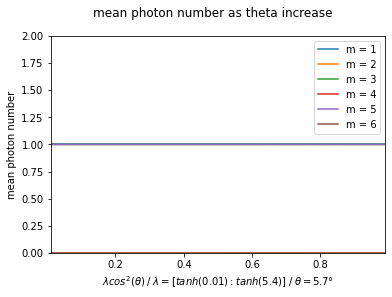

In [ ]:
plt.plot(k, m_list[:,0], label = "m = 1") #m=1 ,shots=2500
plt.plot(k, m_list[:,1], label = "m = 2") #m=2 ,shots=2500
plt.plot(k, m_list[:,2], label = "m = 3") #m=3 ,shots=2500
plt.plot(k, m_list[:,3], label = "m = 4") #m=4 ,shots=2500
plt.plot(k, m_list[:,4], label = "m = 5") #m=5 ,shots=2500
plt.plot(k, m_list[:,5], label = "m = 6") #m=6 ,shots=2500
plt.legend()
# naming the x axis
plt.xlabel(r'$\lambda cos^2(\theta) _ / _ \lambda = [tanh(0.01) : tanh(5.4)] _ / _ θ = 5.7°$')
# naming the y axis
plt.ylabel('mean photon number')
plt.axis([0.01, 0.99, 0, 2])
plt.suptitle('mean photon number as theta increase')
plt.show()



---



---



---



---



* constant θ and varying λ 
  * θ $ \approx $ π/3 | Set k=[0.01 : 0.11] | θ = 1.2

In [ ]:
k_upper = 0.11
precision = 50
theta_set = 1.2
[radius,Len_k] = find_radius(precision,k_upper,theta_set)

In [ ]:
#list has been copied from the printed result for processing time saving 
m_list =np.zeros((Len_k,m_range))
m_list[:,0] = [1.0011428571428571, 1.002857142857143, 1.0022857142857142, 1.0062857142857142, 1.0057142857142858, 1.0102857142857142, 1.0131428571428571, 1.0097142857142858, 1.010857142857143, 1.0154285714285713, 1.0142857142857142, 1.0234285714285714, 1.0285714285714285, 1.02, 1.024, 1.0251428571428571, 1.0371428571428571, 1.0325714285714285, 1.0331428571428571, 1.0394285714285714, 1.0451428571428572, 1.044, 1.046857142857143, 1.0582857142857143, 1.0634285714285714, 1.0651428571428572, 1.072, 1.0794285714285714, 1.08, 1.0794285714285714, 1.0908571428571427, 1.0862857142857143, 1.1062857142857143, 1.1068571428571428, 1.1068571428571428, 1.112, 1.1245714285714286, 1.1525714285714286, 1.1428571428571428, 1.1542857142857144, 1.1668571428571428, 1.1737142857142857, 1.176, 1.1862857142857144, 1.1937142857142857, 1.193142857142857, 1.2034285714285715, 1.2154285714285715, 1.2222857142857142, 1.225142857142857]
m_list[:,1] = [0.004571428571428572, 0.010285714285714285, 0.013714285714285714, 0.015428571428571429, 0.018285714285714287, 0.016, 0.02857142857142857, 0.027428571428571427, 0.037714285714285714, 0.038285714285714284, 0.04857142857142857, 0.05028571428571429, 0.07371428571428572, 0.06914285714285714, 0.08514285714285715, 0.09085714285714286, 0.1, 0.12114285714285715, 0.12457142857142857, 0.12685714285714286, 0.1417142857142857, 0.1377142857142857, 0.168, 0.17085714285714285, 0.18685714285714286, 0.19885714285714284, 0.22914285714285715, 0.21828571428571428, 0.2377142857142857, 0.24971428571428572, 0.24342857142857144, 0.27885714285714286, 0.3057142857142857, 0.3057142857142857, 0.3211428571428571, 0.348, 0.35314285714285715, 0.39257142857142857, 0.38742857142857146, 0.404, 0.41485714285714287, 0.4702857142857143, 0.48514285714285715, 0.508, 0.5428571428571428, 0.5428571428571428, 0.5714285714285714, 0.5588571428571428, 0.5948571428571429, 0.6245714285714286]
m_list[:,2] = [1.0045714285714287, 1.0097142857142858, 1.0074285714285713, 1.010857142857143, 1.0182857142857142, 1.0182857142857142, 1.0222857142857142, 1.0314285714285714, 1.0274285714285714, 1.0377142857142858, 1.0422857142857143, 1.0531428571428572, 1.0491428571428572, 1.066857142857143, 1.0737142857142856, 1.0954285714285714, 1.0954285714285714, 1.1011428571428572, 1.1182857142857143, 1.1097142857142857, 1.1131428571428572, 1.1291428571428572, 1.1457142857142857, 1.1571428571428573, 1.1548571428571428, 1.176, 1.2268571428571429, 1.2114285714285715, 1.2268571428571429, 1.228, 1.2554285714285713, 1.2685714285714285, 1.3, 1.318857142857143, 1.3245714285714285, 1.3497142857142856, 1.3702857142857143, 1.3525714285714285, 1.3674285714285714, 1.3851428571428572, 1.44, 1.4662857142857142, 1.4777142857142858, 1.4725714285714286, 1.5131428571428571, 1.5234285714285714, 1.570857142857143, 1.58, 1.5914285714285714, 1.6177142857142857]
m_list[:,3] = [0.014285714285714285, 0.02857142857142857, 0.022857142857142857, 0.04342857142857143, 0.04742857142857143, 0.06342857142857143, 0.06742857142857143, 0.08514285714285715, 0.09942857142857142, 0.11771428571428572, 0.14342857142857143, 0.18514285714285714, 0.15828571428571428, 0.18628571428571428, 0.232, 0.2542857142857143, 0.25257142857142856, 0.25142857142857145, 0.29828571428571427, 0.30057142857142854, 0.36742857142857144, 0.376, 0.42114285714285715, 0.4228571428571429, 0.4685714285714286, 0.5177142857142857, 0.5228571428571429, 0.5531428571428572, 0.5988571428571429, 0.6828571428571428, 0.6897142857142857, 0.6982857142857143, 0.7411428571428571, 0.8131428571428572, 0.8171428571428572, 0.8542857142857143, 0.8931428571428571, 0.9177142857142857, 0.9891428571428571, 0.9765714285714285, 1.1, 1.0902857142857143, 1.1257142857142857, 1.2188571428571429, 1.213142857142857, 1.2577142857142858, 1.3697142857142857, 1.3971428571428572, 1.4028571428571428, 1.4102857142857144]
m_list[:,4] = [1.0074285714285713, 1.010857142857143, 1.018857142857143, 1.0222857142857142, 1.0257142857142858, 1.036, 1.042857142857143, 1.0645714285714285, 1.0697142857142856, 1.074857142857143, 1.0902857142857143, 1.0994285714285714, 1.12, 1.1257142857142857, 1.1234285714285714, 1.1565714285714286, 1.1868571428571428, 1.1982857142857142, 1.2034285714285715, 1.236, 1.248, 1.2697142857142858, 1.2994285714285714, 1.3171428571428572, 1.3194285714285714, 1.3817142857142857, 1.376, 1.404, 1.424, 1.4708571428571429, 1.5045714285714287, 1.532, 1.5531428571428572, 1.6034285714285714, 1.6108571428571428, 1.612, 1.672, 1.7382857142857142, 1.7234285714285715, 1.7657142857142858, 1.8194285714285714, 1.8491428571428572, 1.9308571428571428, 1.9685714285714286, 1.972, 2.073714285714286, 2.0588571428571427, 2.077714285714286, 2.149142857142857, 2.1874285714285713]
m_list[:,5] = [0.025714285714285714, 0.045714285714285714, 0.054857142857142854, 0.07085714285714285, 0.09142857142857143, 0.12057142857142857, 0.156, 0.16514285714285715, 0.18514285714285714, 0.21257142857142858, 0.22057142857142858, 0.2977142857142857, 0.30742857142857144, 0.372, 0.3891428571428571, 0.4188571428571429, 0.5005714285714286, 0.49314285714285716, 0.5582857142857143, 0.5965714285714285, 0.6308571428571429, 0.6805714285714286, 0.7594285714285715, 0.7777142857142857, 0.8474285714285714, 0.896, 0.9302857142857143, 0.976, 1.0525714285714285, 1.1, 1.1274285714285714, 1.2045714285714286, 1.2817142857142858, 1.3091428571428572, 1.3977142857142857, 1.4788571428571429, 1.4537142857142857, 1.5474285714285714, 1.6131428571428572, 1.673142857142857, 1.7062857142857142, 1.7765714285714285, 1.828, 1.8948571428571428, 1.9102857142857144, 2.0251428571428574, 2.0828571428571427, 2.1822857142857144, 2.1582857142857144, 2.286857142857143]
theta_D = (theta_set * 180) / (np.pi)
print("In degree: ","θ' = ",theta_D/2,"θ = ", theta_D)
print("r = [",radius[0,0] ,":",radius[precision-1,0],"]")
print("λ = [",np.tanh(radius[0,0]) ,":",np.tanh(radius[precision-1,0]),"]")

In degree:  θ' =  34.37746770784939 θ =  68.75493541569878
r = [ 0.07630740360852767 : 1.2135997051456624 ]
λ = [ 0.07615963967207053 : 0.8377560363927757 ]


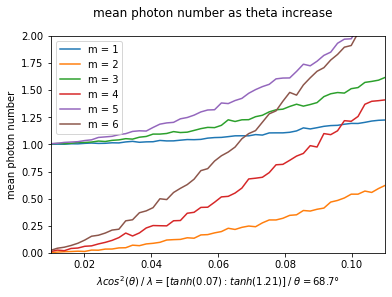

In [ ]:
k = np.linspace(0.01, k_upper, precision)
plt.plot(k, m_list[:,0], label = "m = 1") #m=1 ,shots=2500
plt.plot(k, m_list[:,1], label = "m = 2") #m=2 ,shots=2500
plt.plot(k, m_list[:,2], label = "m = 3") #m=3 ,shots=2500
plt.plot(k, m_list[:,3], label = "m = 4") #m=4 ,shots=2500
plt.plot(k, m_list[:,4], label = "m = 5") #m=5 ,shots=2500
plt.plot(k, m_list[:,5], label = "m = 6") #m=6 ,shots=2500
plt.legend()
# naming the x axis
plt.xlabel(r'$\lambda cos^2(\theta) _ / _ \lambda = [tanh(0.07) : tanh(1.21)] _ / _ θ = 68.7°$')
# naming the y axis
plt.ylabel('mean photon number')
plt.axis([0.01, k_max, 0, 2])
plt.suptitle('mean photon number as theta increase')
plt.show()

---



---



---



---



* constant θ and varying λ 
  * θ $ \approx $ π/2 | Set k=[0.1e-6 : 0.2e-6] | θ = 1.57

In [ ]:
k_upper = 0.2e-6
k_lower = 0.1e-6
precision = 50
theta_set = 1.57
[radius,Len_k] = find_radius(precision,k_lower,k_upper,theta_set)

In [ ]:
#list has been copied from the printed result for processing time saving 
m_list =np.zeros((Len_k,m_range))
m_list[:,0] = [1.0177142857142858, 1.016, 1.014857142857143, 1.0234285714285714, 1.0245714285714285, 1.032, 1.0234285714285714, 1.0222857142857142, 1.024, 1.0302857142857142, 1.0274285714285714, 1.0302857142857142, 1.038857142857143, 1.0302857142857142, 1.0297142857142858, 1.028, 1.0371428571428571, 1.030857142857143, 1.0297142857142858, 1.0354285714285714, 1.0411428571428571, 1.0377142857142858, 1.0342857142857143, 1.034857142857143, 1.046857142857143, 1.0411428571428571, 1.0422857142857143, 1.0445714285714285, 1.04, 1.046857142857143, 1.0474285714285714, 1.0462857142857143, 1.050857142857143, 1.0497142857142858, 1.0474285714285714, 1.0514285714285714, 1.0594285714285714, 1.066857142857143, 1.06, 1.0685714285714285, 1.0805714285714285, 1.0691428571428572, 1.0645714285714285, 1.0685714285714285, 1.08, 1.0685714285714285, 1.068, 1.0731428571428572, 1.0731428571428572, 1.0811428571428572]
m_list[:,1] = [0.061714285714285715, 0.061142857142857145, 0.06457142857142857, 0.061142857142857145, 0.06685714285714285, 0.06457142857142857, 0.07428571428571429, 0.061714285714285715, 0.07314285714285715, 0.06457142857142857, 0.08628571428571429, 0.08171428571428571, 0.10514285714285715, 0.08628571428571429, 0.10114285714285715, 0.09828571428571428, 0.10171428571428572, 0.11314285714285714, 0.11142857142857143, 0.108, 0.11542857142857142, 0.104, 0.11885714285714286, 0.12457142857142857, 0.12514285714285714, 0.12971428571428573, 0.136, 0.12628571428571428, 0.13485714285714287, 0.14457142857142857, 0.12914285714285714, 0.15028571428571427, 0.16514285714285715, 0.15542857142857142, 0.14914285714285713, 0.15485714285714286, 0.172, 0.17314285714285715, 0.16171428571428573, 0.16857142857142857, 0.1782857142857143, 0.18857142857142858, 0.18742857142857142, 0.188, 0.21714285714285714, 0.196, 0.22857142857142856, 0.19942857142857143, 0.212, 0.22342857142857142]
m_list[:,2] = [1.0525714285714285, 1.056, 1.06, 1.0611428571428572, 1.058857142857143, 1.056, 1.0622857142857143, 1.0685714285714285, 1.0645714285714285, 1.0731428571428572, 1.0691428571428572, 1.0822857142857143, 1.072, 1.0822857142857143, 1.086857142857143, 1.1022857142857143, 1.096, 1.0954285714285714, 1.1022857142857143, 1.0942857142857143, 1.088, 1.1, 1.1091428571428572, 1.1148571428571428, 1.0971428571428572, 1.1114285714285714, 1.1405714285714286, 1.1302857142857143, 1.1257142857142857, 1.1348571428571428, 1.1337142857142857, 1.136, 1.1554285714285715, 1.1497142857142857, 1.152, 1.169142857142857, 1.172, 1.1508571428571428, 1.1525714285714286, 1.1508571428571428, 1.1834285714285715, 1.1828571428571428, 1.184, 1.1857142857142857, 1.1845714285714286, 1.188, 1.209142857142857, 1.1868571428571428, 1.1948571428571428, 1.2142857142857142]
m_list[:,3] = [0.14857142857142858, 0.17885714285714285, 0.1737142857142857, 0.1782857142857143, 0.172, 0.18685714285714286, 0.176, 0.192, 0.2, 0.20857142857142857, 0.23142857142857143, 0.25257142857142856, 0.212, 0.23542857142857143, 0.264, 0.27314285714285713, 0.25771428571428573, 0.23885714285714285, 0.27885714285714286, 0.2502857142857143, 0.3057142857142857, 0.29714285714285715, 0.31942857142857145, 0.3, 0.3262857142857143, 0.3314285714285714, 0.328, 0.344, 0.35714285714285715, 0.4057142857142857, 0.38285714285714284, 0.3851428571428571, 0.4, 0.4228571428571429, 0.42457142857142854, 0.412, 0.424, 0.4165714285714286, 0.46514285714285714, 0.4542857142857143, 0.49714285714285716, 0.48, 0.49885714285714283, 0.5325714285714286, 0.5102857142857142, 0.528, 0.564, 0.56, 0.5445714285714286, 0.5451428571428572]
m_list[:,4] = [1.1148571428571428, 1.0977142857142856, 1.1034285714285714, 1.1177142857142857, 1.1091428571428572, 1.1154285714285714, 1.1211428571428572, 1.14, 1.132, 1.1325714285714286, 1.1491428571428572, 1.1491428571428572, 1.164, 1.16, 1.148, 1.1657142857142857, 1.1902857142857144, 1.1874285714285715, 1.1862857142857144, 1.2022857142857142, 1.205142857142857, 1.208, 1.2194285714285715, 1.2285714285714286, 1.2102857142857142, 1.2428571428571429, 1.2222857142857142, 1.2417142857142858, 1.2388571428571429, 1.2634285714285713, 1.2805714285714285, 1.2834285714285714, 1.278857142857143, 1.302857142857143, 1.2942857142857143, 1.258857142857143, 1.3091428571428572, 1.3394285714285714, 1.3171428571428572, 1.324, 1.338857142857143, 1.3485714285714285, 1.3811428571428572, 1.3788571428571428, 1.3645714285714285, 1.392, 1.3811428571428572, 1.3754285714285714, 1.3994285714285715, 1.4062857142857144]
m_list[:,5] = [0.27485714285714286, 0.30457142857142855, 0.31657142857142856, 0.3325714285714286, 0.33314285714285713, 0.3434285714285714, 0.3697142857142857, 0.3668571428571429, 0.3628571428571429, 0.3777142857142857, 0.3525714285714286, 0.4342857142857143, 0.4165714285714286, 0.4565714285714286, 0.4491428571428571, 0.44971428571428573, 0.5091428571428571, 0.4777142857142857, 0.5131428571428571, 0.5028571428571429, 0.5131428571428571, 0.5457142857142857, 0.5714285714285714, 0.5645714285714286, 0.6045714285714285, 0.6125714285714285, 0.6302857142857143, 0.6194285714285714, 0.6485714285714286, 0.6691428571428572, 0.6668571428571428, 0.7131428571428572, 0.7228571428571429, 0.7274285714285714, 0.776, 0.7994285714285714, 0.76, 0.7925714285714286, 0.808, 0.8422857142857143, 0.8308571428571428, 0.856, 0.8491428571428571, 0.8948571428571429, 0.8725714285714286, 0.9302857142857143, 0.9177142857142857, 0.9931428571428571, 0.9445714285714286, 0.9817142857142858]
theta_D = (theta_set * 180) / (np.pi)
print("In degree: ","θ' = ",theta_D/2,"θ = ", theta_D)
print("r = [",radius[0,0] ,":",radius[precision-1,0],"]")
print("λ = [",np.tanh(radius[0,0]) ,":",np.tanh(radius[precision-1,0]),"]")

In degree:  θ' =  44.97718691776963 θ =  89.95437383553926
r = [ 0.15902184597403873 : 0.3265191776184321 ]
λ = [ 0.15769482207973276 : 0.3153896441594656 ]


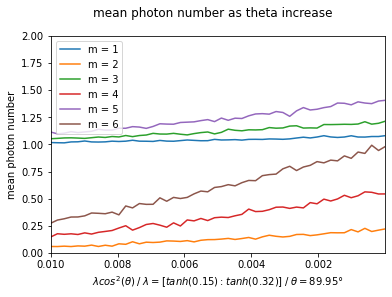

In [ ]:
k = np.linspace(0.01, k_upper, precision)
plt.plot(k, m_list[:,0], label = "m = 1") #m=1 ,shots=2500
plt.plot(k, m_list[:,1], label = "m = 2") #m=2 ,shots=2500
plt.plot(k, m_list[:,2], label = "m = 3") #m=3 ,shots=2500
plt.plot(k, m_list[:,3], label = "m = 4") #m=4 ,shots=2500
plt.plot(k, m_list[:,4], label = "m = 5") #m=5 ,shots=2500
plt.plot(k, m_list[:,5], label = "m = 6") #m=6 ,shots=2500
plt.legend()
# naming the x axis
plt.xlabel(r'$\lambda cos^2(\theta) _ / _ \lambda = [tanh(0.15) : tanh(0.32)] _ / _ θ = 89.95°$')
# naming the y axis
plt.ylabel('mean photon number')
plt.axis([0.01, k_max, 0, 2])
plt.suptitle('mean photon number as theta increase')
plt.show()